In [2]:
import numpy as np
import pylab as plt
from astropy.io import fits
%matplotlib inline

In [3]:
tab1=fits.open('/home/spectram/projects/AST3003S/l_297_b_-15/20210912-062349_SPECTRUM-PROJ01-GAL_04#_01#.fits')[1]
tab2=fits.open('/home/spectram/projects/AST3003S/l_297_b_-15/20210912-061658_SPECTRUM-PROJ01-GAL_03#_01#.fits')[1]
tab3=fits.open('/home/spectram/projects/AST3003S/l_297_b_-15/20210912-063041_SPECTRUM-PROJ01-GAL_05#_01#.fits')[1]
tab4=fits.open('/home/spectram/projects/AST3003S/l_297_b_-15/20210912-060233_SPECTRUM-PROJ01-GAL_01#_01#.fits')[1]
tab5=fits.open('/home/spectram/projects/AST3003S/l_297_b_-15/20210912-061012_SPECTRUM-PROJ01-GAL_02#_01#.fits')[1]

bonn_calib=plt.loadtxt('bonn_l_207_b_-15.txt',skiprows = 4)

In [4]:
dat=tab1.data[0]['RIGHT_POL']

ydata1=np.zeros(dat.size) #empty array to accept summed values    
for i in range (0,len(tab1.data)-1,3): #takes every third value on the range 0 to end
    ydata1=ydata1+tab1.data[i]['RIGHT_POL']
    
ydata2=ydata1
for i in range (1,len(tab1.data)-1,3): #takes every third value on the range 0 to end
    ydata2=ydata2+tab1.data[i]['RIGHT_POL']
    
ydata3=ydata2
for i in range (0,len(tab2.data)-1,3): #takes every third value on the range 0 to end
    ydata3=ydata3+tab2.data[i]['RIGHT_POL']
    
ydata4=ydata3
for i in range (1,len(tab2.data)-1,3): #takes every third value on the range 0 to end
    ydata4=ydata4+tab2.data[i]['RIGHT_POL']
    
ydata5=ydata4
for i in range (0,len(tab3.data)-1,3): #takes every third value on the range 0 to end
    ydata5=ydata5+tab3.data[i]['RIGHT_POL']
    
ydata6=ydata5
for i in range (1,len(tab3.data)-1,3): #takes every third value on the range 0 to end
    ydata6=ydata6+tab3.data[i]['RIGHT_POL']
    
ydata7=ydata6
for i in range (0,len(tab4.data)-1,3): #takes every third value on the range 0 to end
    ydata7=ydata7+tab4.data[i]['RIGHT_POL']

ydata8=ydata7
for i in range (1,len(tab4.data)-1,3): #takes every third value on the range 0 to end
    ydata8=ydata8+tab4.data[i]['RIGHT_POL']
    
ydata9=ydata8
for i in range (0,len(tab5.data)-1,3): #takes every third value on the range 0 to end
    ydata9=ydata9+tab5.data[i]['RIGHT_POL']
    
ydata10=ydata9
for i in range (1,len(tab5.data)-1,3): #takes every third value on the range 0 to end
    ydata10=ydata10+tab5.data[i]['RIGHT_POL']

bonn_x = bonn_calib[:,2]
bonn_y = bonn_calib[:,1]
bonn_v = bonn_calib[:,0]

DIAMETER =                    3  / TELESCOPE diameter                            [astropy.io.fits.card]


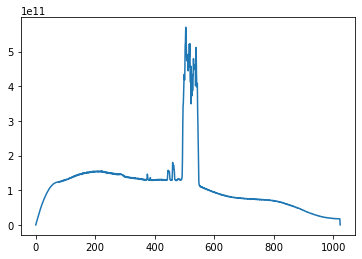

In [5]:
plt.plot(ydata10)

3.76558812179976e-09
3.76558812179976e-09


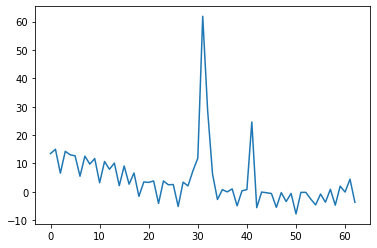

In [15]:
low=344
mean_low=386
high=407
mean_high=442

xdata=np.linspace(1397.5+0.0305,1460-0.0305,dat.size)
y_calib=[]
mean_range=[ydata10[i] for i in range (mean_low, mean_high)]
y_calib=ydata10-np.mean(mean_range)

y_scale=max(bonn_y)/max([y_calib[i] for i in range (low,high)])


print(max(bonn_y)/max(y_calib[344:407]))
y_calib=y_calib*y_scale

print(y_scale)
plt.plot(y_calib[344:407])

scaling factor used = 3.76558812179976e-09
frequency shift due to LSR= 0.041999999999916326
61.89


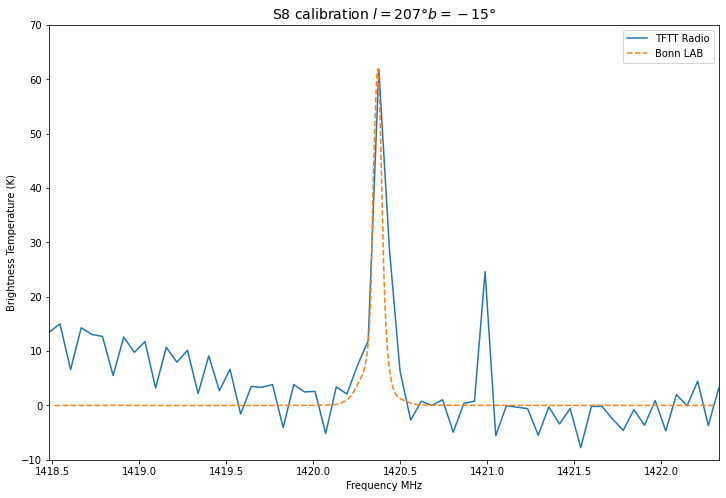

In [5]:

x_shift=1420.405-1420.363
#x_shiftb=xdata[np.argmax([y_calib[i] for i in range (low,high)])+low]-bonn_x[np.argmax(bonn_y)]
xdata1=xdata-x_shift

xdatav=(300000)*((1420.405-xdata1)/1420.405)

plt.figure(figsize=(12,8))

plt.xlabel('Frequency MHz')
plt.ylabel('Brightness Temperature (K)')
plt.xlim(xdata1[low],xdata1[high])
plt.ylim(-10,70)
plt.title('S8 calibration $l=207\degree b=-15\degree$', fontsize=14)

plt.plot(xdata1,y_calib,label='TFTT Radio')
plt.plot(bonn_x,bonn_y, label='Bonn LAB', linestyle='--')
plt.legend()

#plt.savefig('s8_calib_1000s')
print('scaling factor used =',y_scale)
print('frequency shift due to LSR=',x_shift)
print(max(bonn_y))

In [6]:
f = open('s8_calib.txt','w')

#f.write('title \n')

for i in range (dat.size):
    f.write(str(xdata[i]))
    f.write('  ')
    f.write(str(ydata1[i]))
    f.write('\n')
    
f.close()

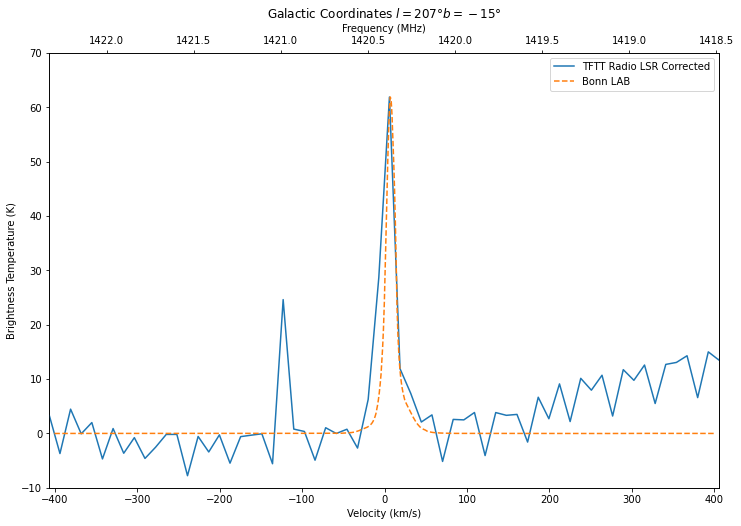

In [9]:
plt.rcParams["figure.figsize"] = [12, 8]
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.set_title('Galactic Coordinates $l=207\degree b=-15\degree$')

ax1.plot(xdatav, np.ones(len(xdatav)), alpha=0) #incorrect placement on plot

ax1.set_xlim([xdatav[low], xdatav[high]])
ax2.set_xlim([xdata1[low], xdata1[high]])
ax1.set_ylim(-10,70)
ax2.set_ylim(-10,70)

ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Brightness Temperature (K)')
ax2.plot(xdata1,y_calib,label='TFTT Radio LSR Corrected')
ax2.plot(bonn_x,bonn_y, label='Bonn LAB', linestyle='--')
ax2.set_xlabel('Frequency (MHz)')
ax1.invert_xaxis()
ax2.invert_xaxis()
ax2.legend()
#fig=plt.savefig('LSR_corrected')

In [8]:
f = open('freq_vel.txt','w')

#f.write('title \n')

for i in range (dat.size):
    f.write(str(xdata1[i]))
    f.write('  ')
    f.write(str(xdatav[i]))
    f.write('\n')
    
f.close()